In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



In [3]:
def RandomForest_test(path, cv=5, test_size=0.3):
    # Import dataset
    df_dataset = pd.read_csv(path)

    # # Encode Labels for numeric classification
    # label_encoder = LabelEncoder()
    # df_dataset['Label'] = label_encoder.fit_transform(df_dataset['Label'])
    
    # Set a random state for sampling
    RANDOM_STATE_SEED = np.random.randint(123)
    print(f'Random Seed:{RANDOM_STATE_SEED}')
    
    # Split dataset in train and test
    train, test = train_test_split(df_dataset, test_size=test_size, random_state=RANDOM_STATE_SEED)
    
    # Count how many instances there are in each label
    print(df_dataset["Label"].value_counts())

    # Separate in X and y for better classification
    y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
    X_train = train.values

    print(f'Tipo X_train: {type(X_train)} Tipo y_train: {type(y_train)} Shape X_train:{X_train.shape} Shape y_train: {y_train.shape}')

    y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
    X_test = test.values

    print(f'Tipo X_test: {type(X_test)} Tipo y_test: {type(y_test)} Shape X_test:{X_test.shape} Shape y_test: {y_test.shape}')
    
    # Define the used classification model
    model = RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None,
        verbose=0,
        warm_start=False,
        ccp_alpha=0.0,
        max_samples=None
    )

    # Define the grid for hyperparameter tuning
    hyperparameters = {
        'n_estimators': [50, 75, 100, 125, 150]
    }

    # Define the final classification model
    clf = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters,
        cv=cv,
        verbose=1,
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model to the training data 
    %time clf.fit(X=X_train, y=y_train)

    # Print best paramenters
    print("Accuracy score on Validation set: \n")
    print(clf.best_score_ )
    print("---------------")
    print("Best performing hyperparameters on Validation set: ")
    print(clf.best_params_)
    print("---------------")
    print(clf.best_estimator_)

    # Test model on test data and print metrics
    model = clf.best_estimator_
    predictions = model.predict(X_test)
    print(classification_report(y_test,predictions,digits=10))
    print(f'Accuracy on test set: {accuracy_score(y_test, predictions)}')
    print(f'Preccision on test set: {precision_score(y_test, predictions, average=None)}')

    # Print Confusion Matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    
    sns.heatmap(cf_matrix, annot=True)   

Random Seed:42
Label
normal      67297
abnormal    58026
Name: count, dtype: int64
Tipo X_train: <class 'numpy.ndarray'> Tipo y_train: <class 'numpy.ndarray'> Shape X_train:(87726, 38) Shape y_train: (87726,)
Tipo X_test: <class 'numpy.ndarray'> Tipo y_test: <class 'numpy.ndarray'> Shape X_test:(37597, 38) Shape y_test: (37597,)
Fitting 2 folds for each of 5 candidates, totalling 10 fits
CPU times: user 3.94 s, sys: 496 ms, total: 4.44 s
Wall time: 10.6 s
Accuracy score on Validation set: 

0.9981647402138476
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 50}
---------------
RandomForestClassifier(n_estimators=50)
              precision    recall  f1-score   support

    abnormal  0.9997138278 0.9983424783 0.9990276825     17496
      normal  0.9985590062 0.9997512562 0.9991547755     20101

    accuracy                      0.9990956725     37597
   macro avg  0.9991364170 0.9990468672 0.9990912290     37597
weighted avg  0.9990964097 0.999095672

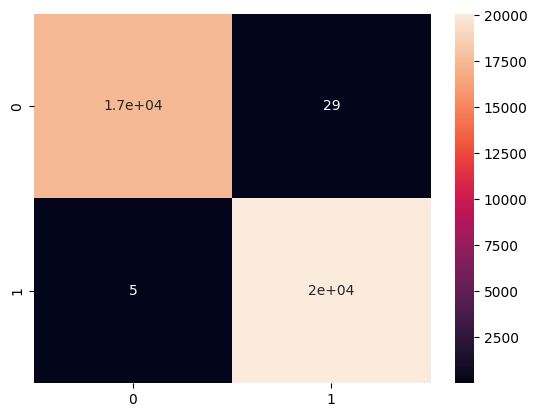

In [4]:
RandomForest_test('/home/mintssj/Downloads/datasets/filtered/NSL_KDD_equal.csv', cv=2)